In [26]:
%load_ext autoreload
%autoreload 2
import os
import pickle as pkl
from os.path import join as oj

import dvu
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import ceil
from tqdm import tqdm
import numpy as np
import matplotlib.patches as patches
import sys
sys.path.append('..')

mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

# change working directory to project root
while os.getcwd().split('/')[-1] != 'imodels-experiments':
    os.chdir('..')

from config.figs_ensembles.datasets import DATASETS_CLASSIFICATION, DATASETS_REGRESSION
import viz

print('num_datasets', len(DATASETS_CLASSIFICATION), len(DATASETS_REGRESSION))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
num_datasets 11 9


In [27]:
# run comparison aggregations
!python3 02_aggregate_results.py

  0%|                                                    | 0/40 [00:00<?, ?it/s]02_aggregate_results.py:53: UserWarning: bad complexity range
  warnings.warn(f'bad complexity range')
100%|███████████████████████████████████████████| 40/40 [00:20<00:00,  1.94it/s]
successfully processed 20 / 40 individual seeds
100%|███████████████████████████████████████████| 20/20 [00:20<00:00,  1.05s/it]
successfully processed 20 / 20 averaged seeds


# overarching plots

In [28]:
DATASETS_CLASSIFICATION

[('sonar', 'sonar', 'pmlb'),
 ('heart', 'heart', 'imodels'),
 ('breast-cancer', 'breast_cancer', 'imodels'),
 ('haberman', 'haberman', 'imodels'),
 ('ionosphere', 'ionosphere', 'pmlb'),
 ('diabetes', 'diabetes', 'pmlb'),
 ('german-credit', 'german', 'pmlb'),
 ('juvenile', 'juvenile_clean', 'imodels'),
 ('recidivism', 'compas_two_year_clean', 'imodels'),
 ('credit', 'credit_card_clean', 'imodels'),
 ('readmission', 'readmission_clean', 'imodels')]

  0%|          | 0/7 [00:00<?, ?it/s]/accounts/projects/vision/chandan/imodels-experiments/viz.py:241: UserWarning: tried BaggingFIGS but valid keys are dict_keys(['CART', 'FIGS', 'Linear', 'RandomForest'])
  #                 raise Exception(f'tried {name} but valid keys are {df.groupby("estimator").groups.keys()}')
/accounts/projects/vision/chandan/imodels-experiments/viz.py:241: UserWarning: tried RFFIGS but valid keys are dict_keys(['CART', 'FIGS', 'Linear', 'RandomForest'])
  #                 raise Exception(f'tried {name} but valid keys are {df.groupby("estimator").groups.keys()}')
100%|██████████| 7/7 [00:00<00:00, 19.90it/s]


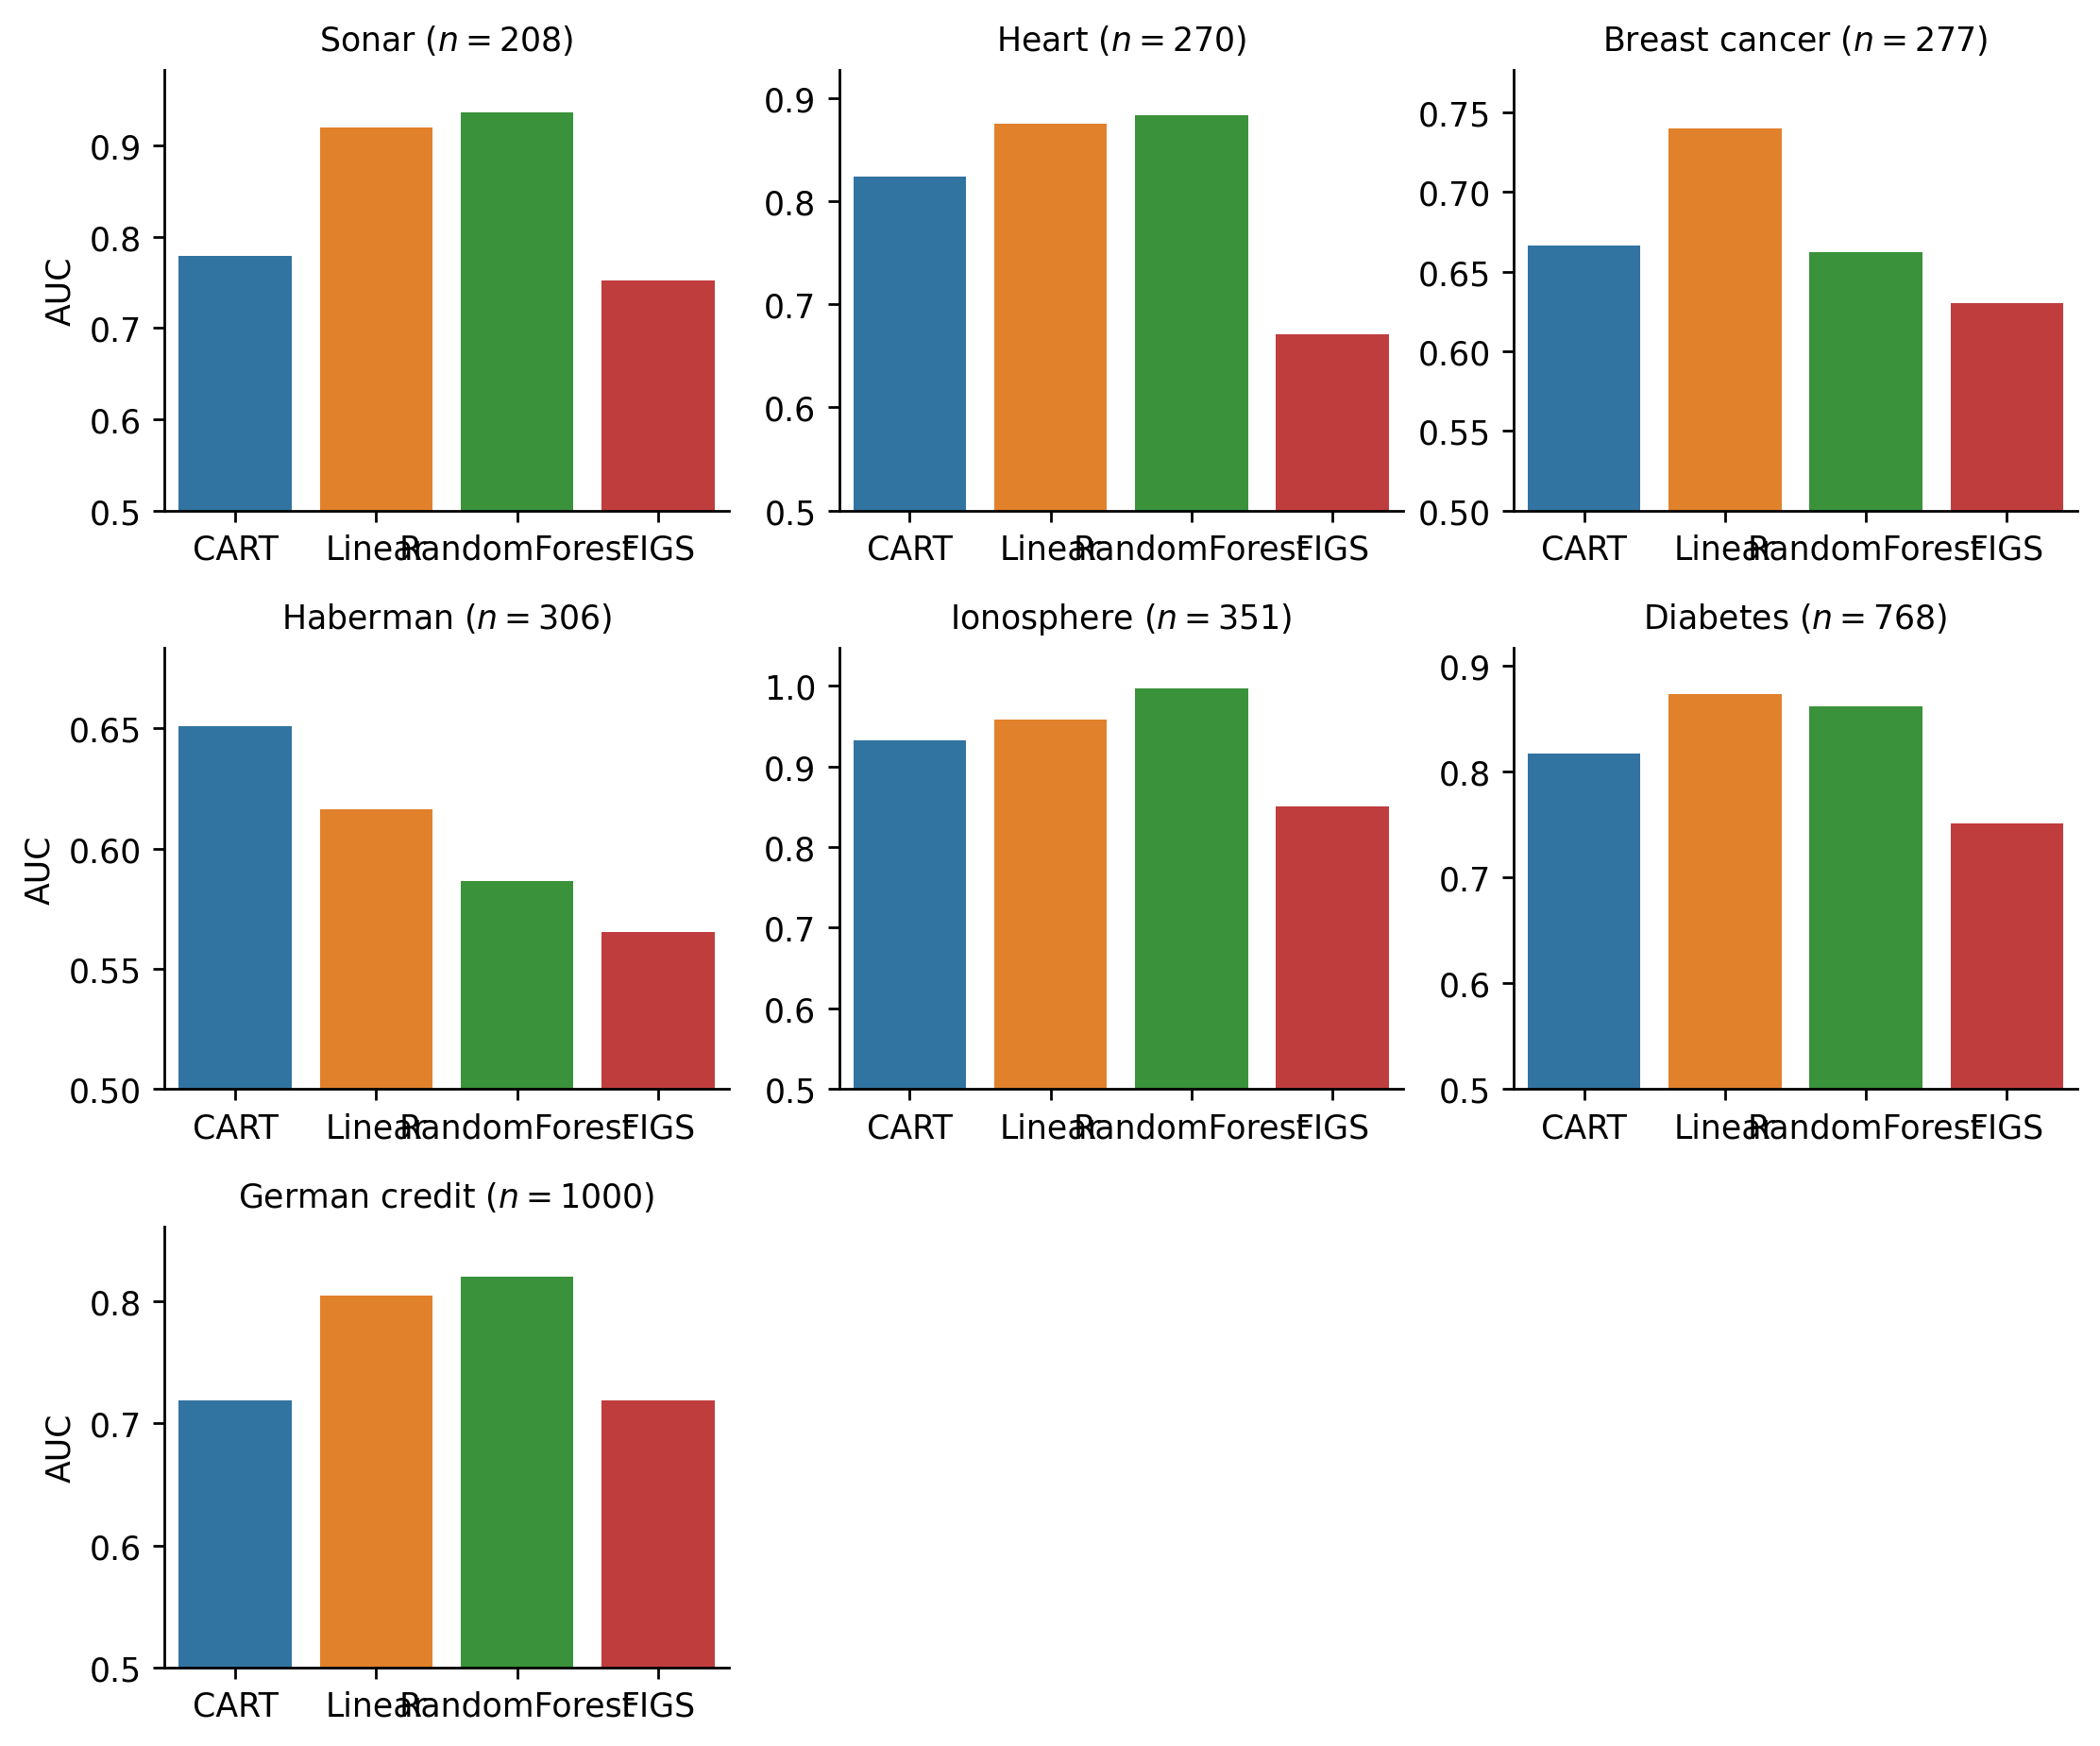

In [35]:
viz.plot_bests(metric='rocauc',
                     datasets=DATASETS_CLASSIFICATION[:7],
                models_to_include=['CART', 'Linear', 'RandomForest', 'FIGS', 'BaggingFIGS', 'RFFIGS'], # FIGS, BaggingFIGS
                config_name='figs_ensembles')

  0%|          | 0/7 [00:00<?, ?it/s]/accounts/projects/vision/chandan/imodels-experiments/viz.py:241: UserWarning: tried BaggingFIGS but valid keys are dict_keys(['CART', 'FIGS', 'Linear', 'RandomForest'])
  #                 raise Exception(f'tried {name} but valid keys are {df.groupby("estimator").groups.keys()}')
/accounts/projects/vision/chandan/imodels-experiments/viz.py:241: UserWarning: tried RFFIGS but valid keys are dict_keys(['CART', 'FIGS', 'Linear', 'RandomForest'])
  #                 raise Exception(f'tried {name} but valid keys are {df.groupby("estimator").groups.keys()}')
100%|██████████| 7/7 [00:00<00:00, 13.73it/s]


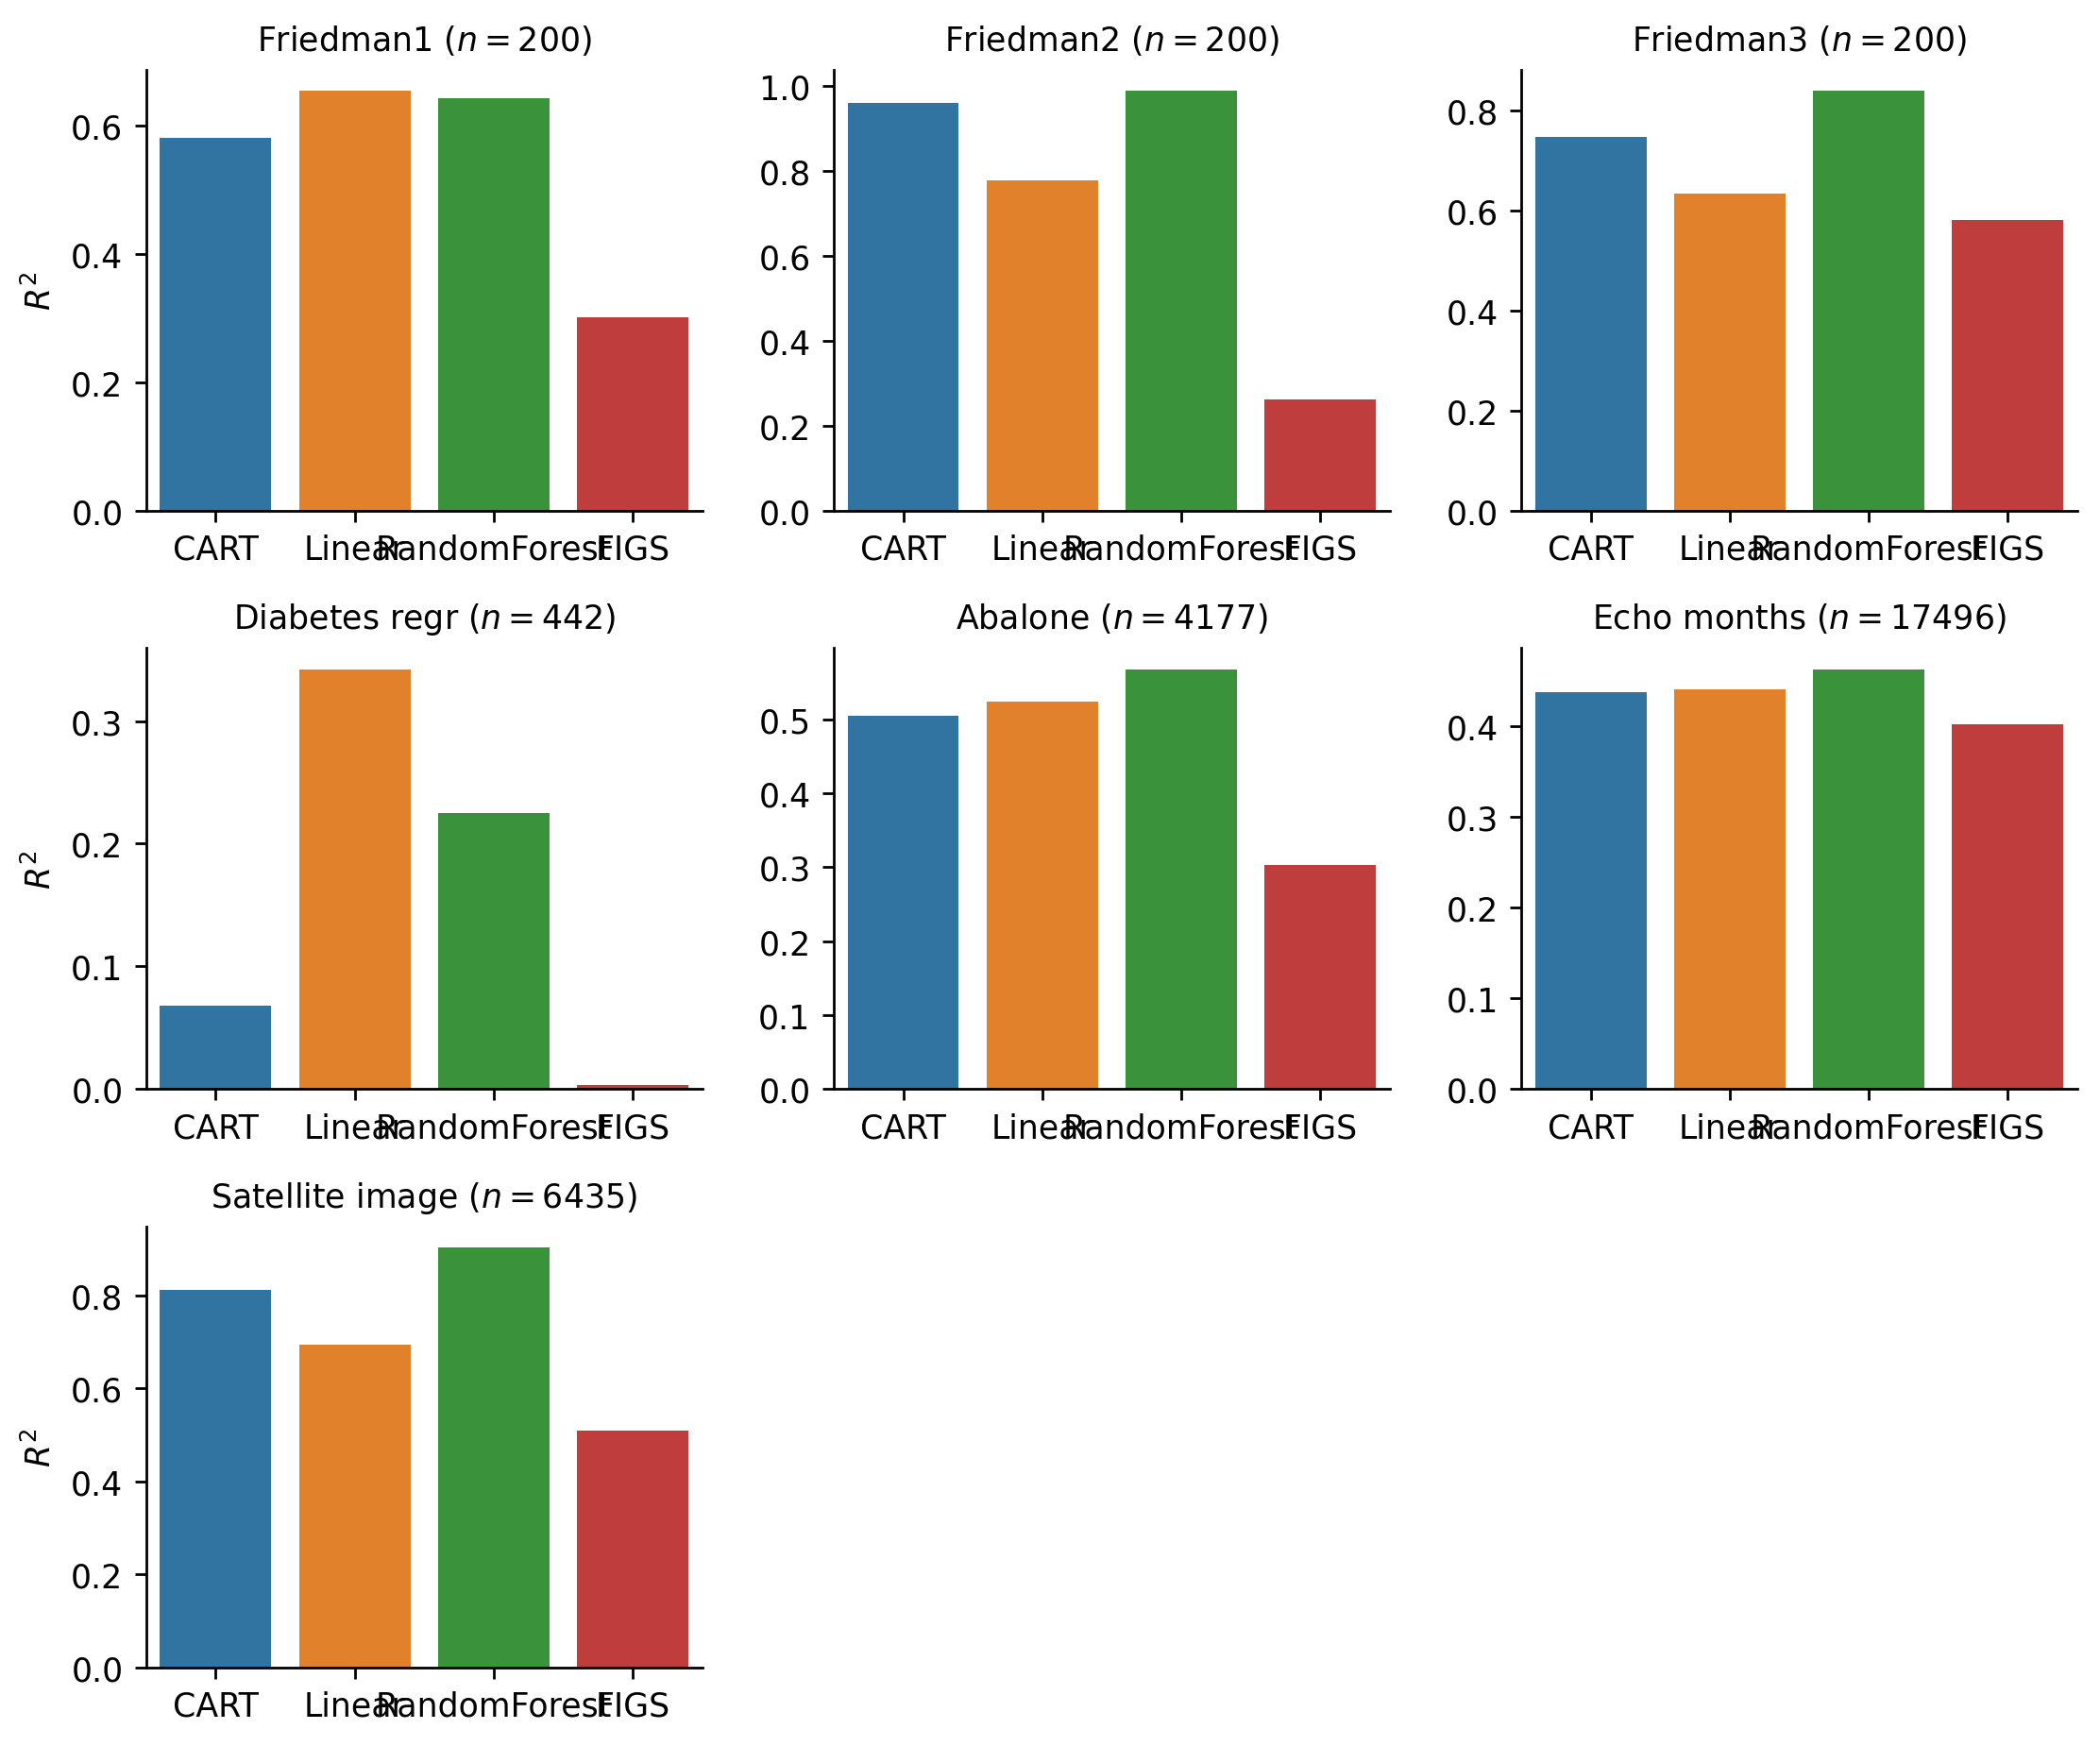

In [36]:
viz.plot_bests(metric='r2',
                     datasets=DATASETS_REGRESSION[:7],
                models_to_include=['CART', 'Linear', 'RandomForest', 'FIGS', 'BaggingFIGS', 'RFFIGS'], # FIGS, 
                config_name='figs_ensembles')

In [62]:
df = pkl.load(open('results/saps/friedman1/train-test/results_aggregated.pkl', 'rb'))['df_mean']

In [ ]:
df.keys()